In [2]:
from sklearn.svm import SVR
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [58]:
from google.colab import files
files.upload()

Saving KO.csv to KO (2).csv


{'KO.csv': b'Date,Open,High,Low,Close,Adj Close,Volume\r\n2/24/2020,59.110001,59.799999,58.57,58.650002,56.70937,14415500\r\n2/25/2020,58.700001,59.200001,57.619999,57.82,55.906826,15915100\r\n2/26/2020,57.98,58.470001,57.48,57.599998,55.694111,15837800\r\n2/27/2020,57.150002,57.889999,54.880001,54.93,53.112457,23754000\r\n2/28/2020,53.830002,53.889999,51.580002,53.490002,51.720104,40891800\r\n3/2/2020,53.93,55.959999,53.700001,55.919998,54.069698,25698600\r\n3/3/2020,56.759998,57.490002,55.639999,56.060001,54.205067,27099200\r\n3/4/2020,56.41,59,56.41,58.919998,56.970428,20526100\r\n3/5/2020,57.799999,58.169998,56.189999,56.740002,54.862564,17948500\r\n3/6/2020,54.939999,55.91,53.98,55.259998,53.431538,22353900\r\n3/9/2020,52.049999,53.580002,51.48,51.860001,50.144035,27898300\r\n3/10/2020,53.220001,53.799999,51.169998,53.66,51.884476,27457400\r\n3/11/2020,52.349998,52.650002,51.139999,52.209999,50.482456,22653900\r\n3/12/2020,48.540001,49.93,46.689999,47.16,45.599552,31913100\r\n3/13

In [57]:
df = pd.read_csv('KO.csv')
df



,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-02-24,59.110001,59.799999,58.570000,58.650002,56.709370,14415500
1,2020-02-25,58.700001,59.200001,57.619999,57.820000,55.906826,15915100
2,2020-02-26,57.980000,58.470001,57.480000,57.599998,55.694111,15837800
3,2020-02-27,57.150002,57.889999,54.880001,54.930000,53.112457,23754000
4,2020-02-28,53.830002,53.889999,51.580002,53.490002,51.720104,40891800
...,...,...,...,...,...,...,...
248,2021-02-17,50.000000,50.490002,49.889999,50.130001,50.130001,12794300
249,2021-02-18,50.160000,50.849998,50.029999,50.770000,50.770000,12747100
250,2021-02-19,50.790001,50.830002,49.970001,50.110001,50.110001,15966700
251,2021-02-22,49.849998,50.880001,49.669998,50.630001,50.630001,14365500


In [87]:
actual_price = df.tail(1)
actual_price

,Date,Open,High,Low,Close,Adj Close,Volume
251,2021-02-22,49.849998,50.880001,49.669998,50.630001,50.630001,14365500


In [60]:
df = df.head(len(df)-1)
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-02-24,59.110001,59.799999,58.570000,58.650002,56.709370,14415500
1,2020-02-25,58.700001,59.200001,57.619999,57.820000,55.906826,15915100
2,2020-02-26,57.980000,58.470001,57.480000,57.599998,55.694111,15837800
3,2020-02-27,57.150002,57.889999,54.880001,54.930000,53.112457,23754000
4,2020-02-28,53.830002,53.889999,51.580002,53.490002,51.720104,40891800
...,...,...,...,...,...,...,...
247,2021-02-16,50.619999,50.720001,50.160000,50.270000,50.270000,15089500
248,2021-02-17,50.000000,50.490002,49.889999,50.130001,50.130001,12794300
249,2021-02-18,50.160000,50.849998,50.029999,50.770000,50.770000,12747100
250,2021-02-19,50.790001,50.830002,49.970001,50.110001,50.110001,15966700


In [61]:
days = list()
adj_close_prices = list()


In [62]:
df_days = df.loc[:, 'Date']
df_adj_close = df.loc[:, 'Adj Close']

In [63]:
for day in df_days:
  days.append([int(day.split('-')[2])])
#depenedent data sets
for adj_close_price in df_adj_close:
  adj_close_prices.append(float(adj_close_price))

In [79]:
days 
adj_close_prices

[56.70936999999999,
 55.906826,
 55.694111,
 53.11245699999999,
 51.720104,
 54.069697999999995,
 54.20506700000001,
 56.970428000000005,
 54.862564,
 53.431538,
 50.144034999999995,
 51.884476,
 50.482456,
 45.599552,
 47.277225,
 44.146214,
 46.01897,
 43.746311,
 40.800629,
 37.357494,
 36.635704,
 38.479195000000004,
 40.586040000000004,
 43.200092,
 41.756512,
 43.892616,
 43.161076,
 41.083488,
 42.868454,
 42.751411,
 45.521522999999995,
 45.365456,
 46.643219,
 47.794182,
 45.775124,
 47.716152,
 46.438389,
 45.940940999999995,
 46.877319,
 45.38496,
 44.263268,
 44.555884999999996,
 43.960892,
 44.312034999999995,
 45.628811,
 45.589802,
 45.960445,
 44.760712,
 44.477848,
 44.029167,
 44.282776,
 43.648769,
 43.502457,
 44.975304,
 44.419331,
 43.717048999999996,
 42.8587,
 42.624611,
 42.195434999999996,
 43.863358000000005,
 43.443939,
 44.760712,
 44.05843,
 43.921875,
 44.955795,
 45.580044,
 45.931183000000004,
 45.531273,
 45.833645000000004,
 45.745865,
 46.721252,
 46

In [80]:
#creating 3 models
lin_svr = SVR(kernel='linear', C=1000.0)
lin_svr.fit(days, adj_close_prices)

poly_svr = SVR(kernel='poly', C=1000.0, degree=2) 
poly_svr.fit(days, adj_close_prices)

rbf_svr = SVR(kernel='rbf', C=1000.0 ,gamma=0.85)
rbf_svr.fit(days, adj_close_prices)



SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.85,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

<function matplotlib.pyplot.show>

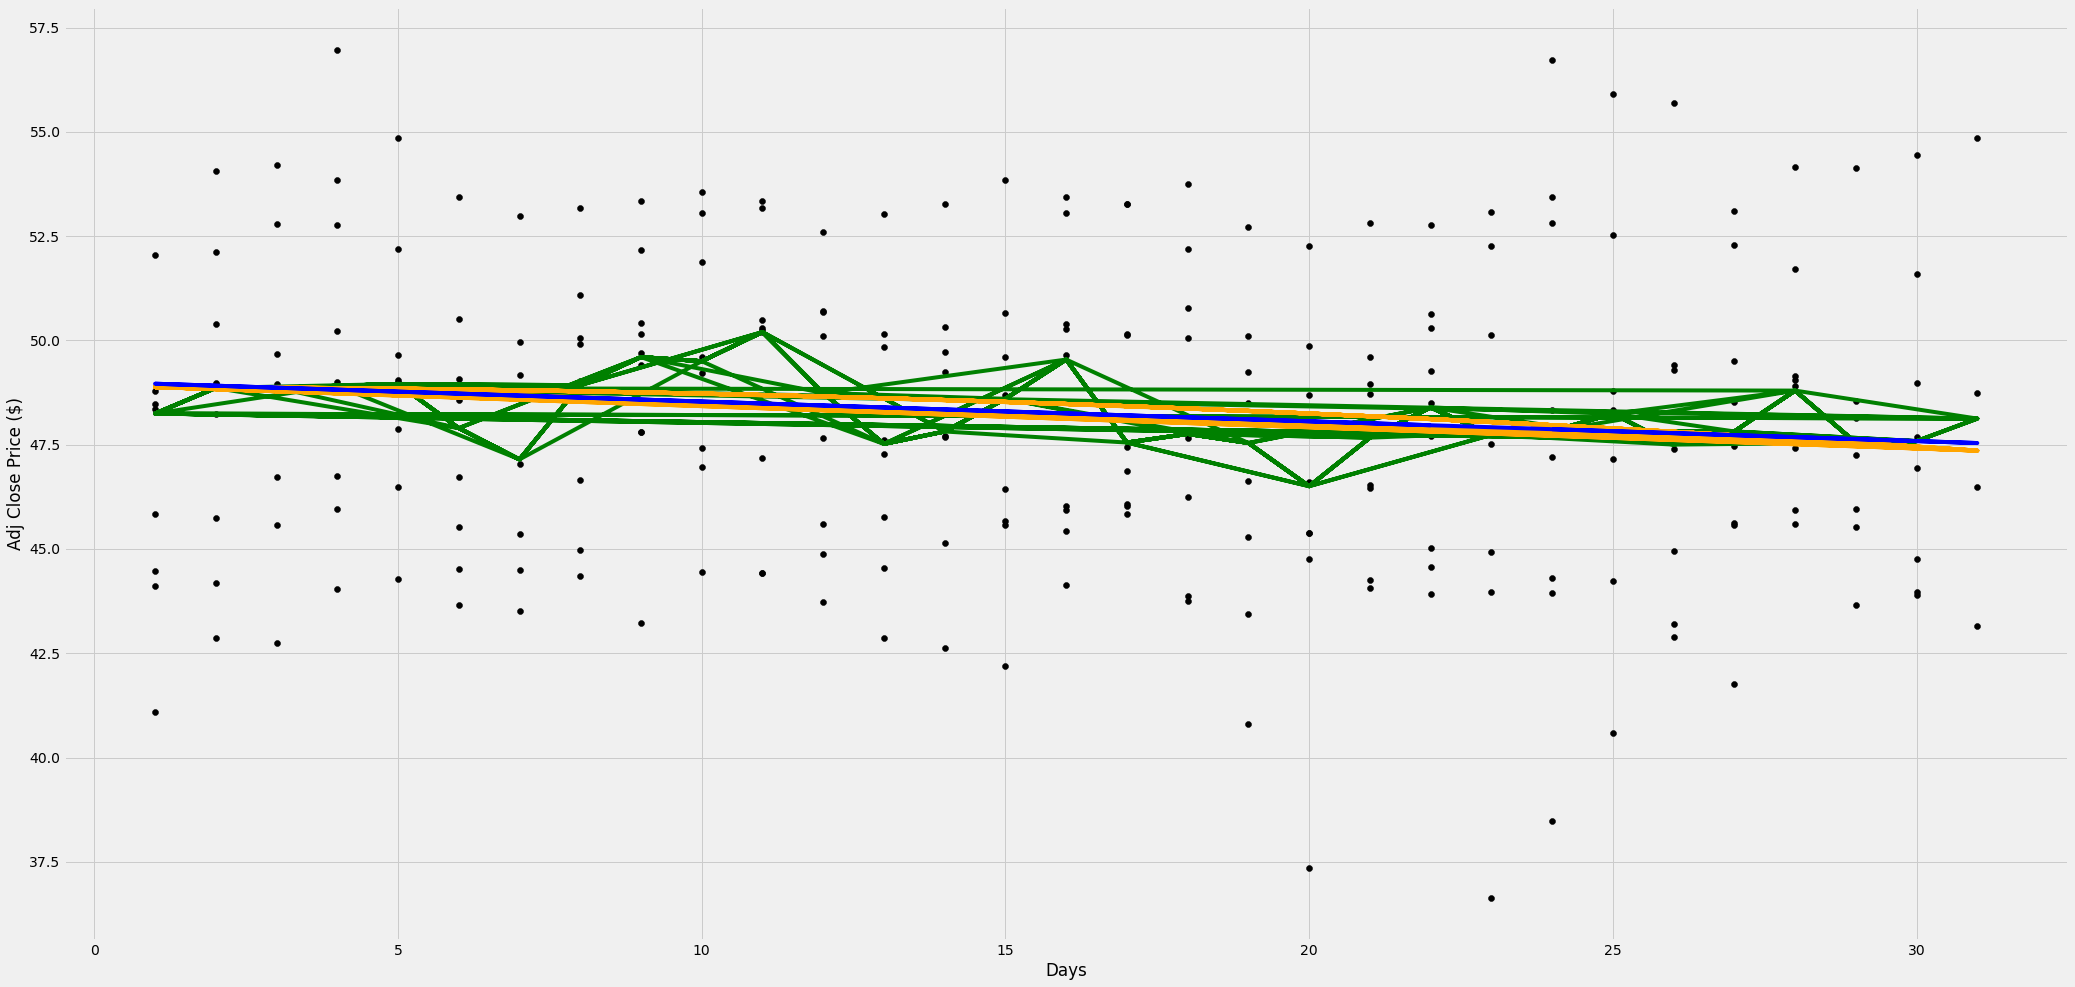

In [81]:
#plot the models
plt.figure(figsize=(32,16))
plt.scatter(days, adj_close_prices, color = 'black', label = 'Data')
plt.plot(days, rbf_svr.predict(days), color = 'green', label= 'RBF Model')
plt.plot(days, poly_svr.predict(days), color = 'orange', label= 'polynomial Model')
plt.plot(days, lin_svr.predict(days), color = 'blue', label= 'Linear Model')
plt.xlabel('Days')
plt.ylabel('Adj Close Price ($)')
plt.legend
plt.show


In [92]:
day = [[22]]

print ('The RBF SVR Predicted price: ', rbf_svr.predict(day))
print ('The Linear SVR Predicted price: ', lin_svr.predict(day))
print ('The Polyomial SVR Predicted price: ', poly_svr.predict(day))

The RBF SVR Predicted price:  [48.39005007]
The Linear SVR Predicted price:  [47.9653477]
The Polyomial SVR Predicted price:  [48.11459115]


In [89]:
print('The actual price ', actual_price['Adj Close'])

The actual price  251    50.630001
Name: Adj Close, dtype: float64
